In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from google.colab import files
uploaded = files.upload()

import io
data= pd.read_csv(io.BytesIO(uploaded['data.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving data.csv to data.csv


In [ ]:
data.head()

,id,business_name,business_number,street_name,owner,area,business_type,street_number,cost
0,1.0,???? ???? ???? ?????,1010,??????,???? ???? ?????,24101,NaN,1011,4
1,2.0,???? ??? ???? ???? ???,3211,??????,???? ??? ???? ???? ???,24101,NaN,1011,1
2,3.0,????? ????? ???? ????,4630,?????? /????? ????????,???? ??? ????? ????,24101,???? ????????? ????????? ???????? ? ??????? ??...,1011,4
3,4.0,????????? ????????? ??????? ????? ??????? ????...,4663,?????? - ??? ???? ???????,???? ???? ????,24101,????? ?????,1032,3
4,5.0,???? ??????? ??????? ??????? ??????,4663,??????,???? ???? ???? ????,24101,????? ??????? ?????? ??????,1032,3


In [ ]:
dataset = data.drop(['id','business_name','street_name','owner','business_type'], axis = 1,inplace=True)

In [ ]:
data.head()

,business_number,area,street_number,cost
0,1010,24101,1011,4
1,3211,24101,1011,1
2,4630,24101,1011,4
3,4663,24101,1032,3
4,4663,24101,1032,3


In [ ]:
print("Is there any missing data? : ", data.isna().any().any())
data.isna().sum()

Is there any missing data? :  False


business_number    0
area               0
street_number      0
cost               0
dtype: int64

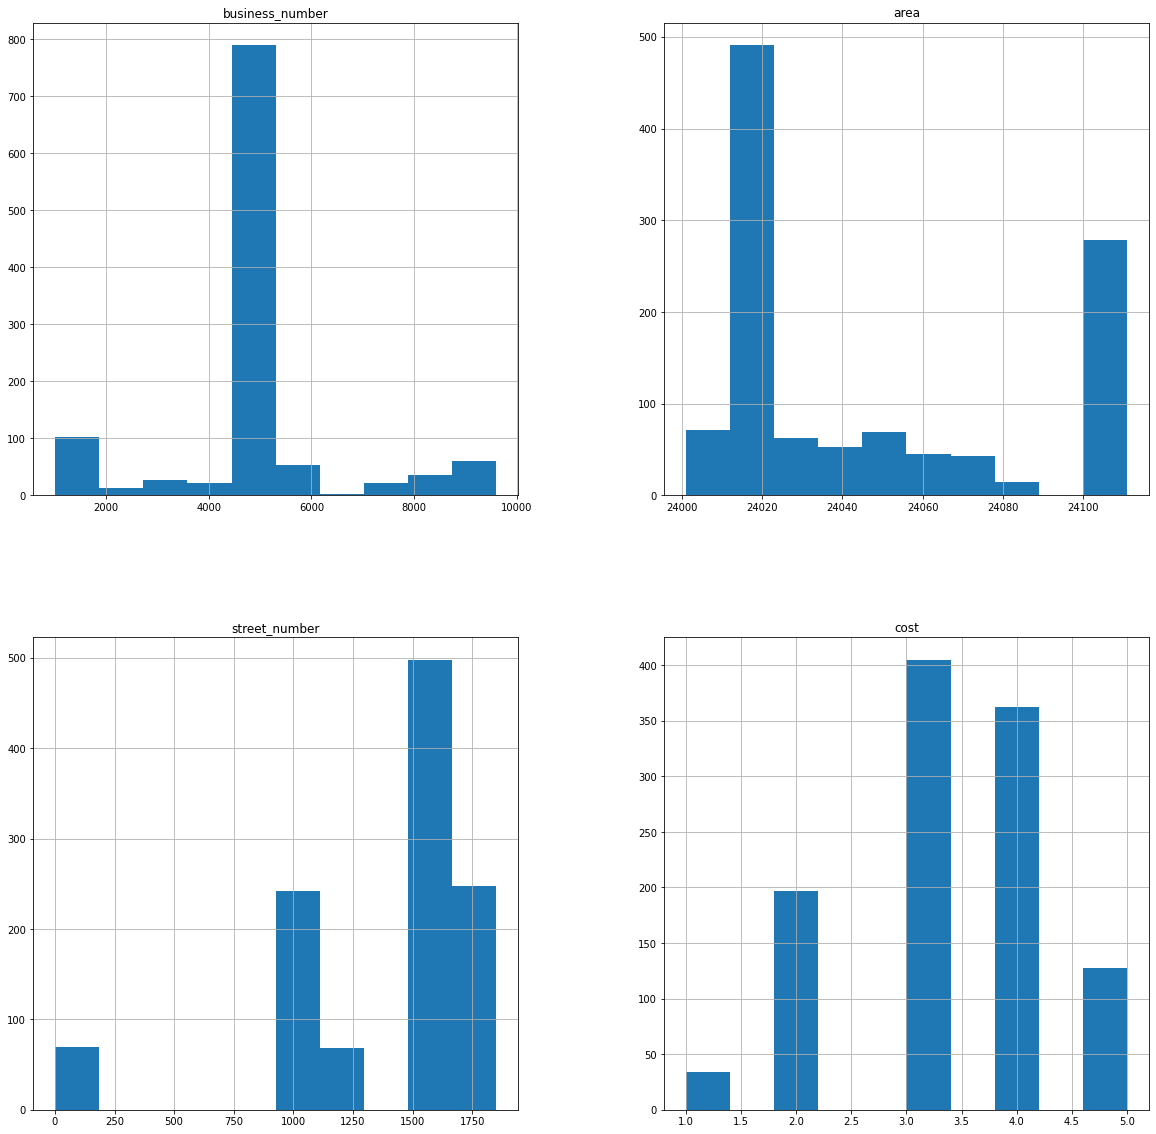

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize=(20,20))
plt.show()

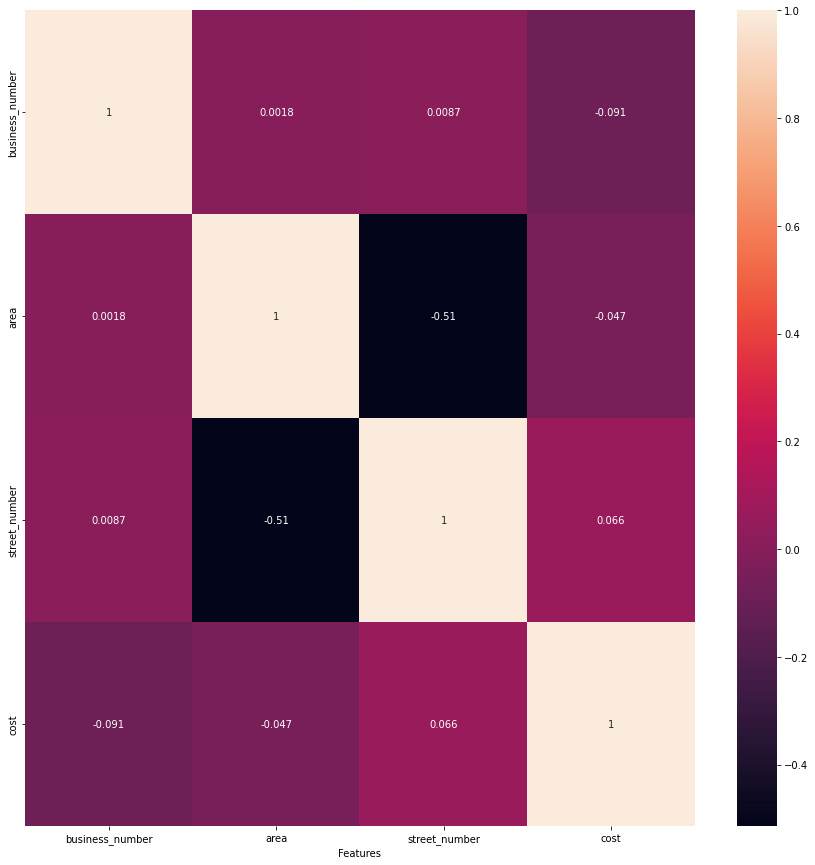

In [ ]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), annot=True,fmt = '.2g', ax= ax)
plt.xlabel('Features')
plt.show()

In [ ]:
data.head()

,business_number,area,street_number,cost
0,1010,24101,1011,4
1,3211,24101,1011,1
2,4630,24101,1011,4
3,4663,24101,1032,3
4,4663,24101,1032,3


In [ ]:
data['cost'].describe()

count    1126.000000
mean        3.313499
std         0.987178
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: cost, dtype: float64

In [ ]:
#cross between 2 colomns to find probability of the cost in each business
df1=pd.DataFrame(data, columns=['business_number','cost'])


In [ ]:
d1 = pd.crosstab(index=df1["business_number"], columns="count") 
d1

col_0,count
business_number,
1010,24
1030,8
1050,2
1071,23
1073,19
...,...
9521,32
9522,8
9529,3


In [ ]:
d2=pd.crosstab(index=df1["cost"], columns="count") 
d2

col_0,count
cost,
1,34
2,197
3,405
4,362
5,128


In [ ]:
d3=pd.crosstab(index=df1["cost"], columns=df1["business_number"],margins=True ) 
d3
#frequency table for cost 

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
cost,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,1,0,0,1,34
2,9,1,1,4,2,0,0,0,1,0,...,2,0,0,1,10,4,1,0,1,197
3,4,0,0,7,5,8,3,1,0,1,...,1,1,0,0,14,1,2,0,1,405
4,11,5,0,6,6,3,2,0,0,0,...,0,0,0,0,1,2,0,0,1,362
5,0,2,1,6,6,1,0,0,0,0,...,0,1,1,0,4,0,0,2,4,128
All,24,8,2,23,19,12,5,1,1,1,...,3,2,1,1,32,8,3,2,8,1126


In [ ]:
d4=d3/d3.loc["All","All"]
d4
#Likelihood table

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
cost,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002664,0.000888,0.000000,0.000000,0.000888,0.030195
2,0.007993,0.000888,0.000888,0.003552,0.001776,0.000000,0.000000,0.000000,0.000888,0.000000,...,0.001776,0.000000,0.000000,0.000888,0.008881,0.003552,0.000888,0.000000,0.000888,0.174956
3,0.003552,0.000000,0.000000,0.006217,0.004440,0.007105,0.002664,0.000888,0.000000,0.000888,...,0.000888,0.000888,0.000000,0.000000,0.012433,0.000888,0.001776,0.000000,0.000888,0.359680
4,0.009769,0.004440,0.000000,0.005329,0.005329,0.002664,0.001776,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000888,0.001776,0.000000,0.000000,0.000888,0.321492
5,0.000000,0.001776,0.000888,0.005329,0.005329,0.000888,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000888,0.000888,0.000000,0.003552,0.000000,0.000000,0.001776,0.003552,0.113677
All,0.021314,0.007105,0.001776,0.020426,0.016874,0.010657,0.004440,0.000888,0.000888,0.000888,...,0.002664,0.001776,0.000888,0.000888,0.028419,0.007105,0.002664,0.001776,0.007105,1.000000


In [ ]:
#find the highest
d4 = d4.drop("All", axis=0)
d4 = d4.drop("All", axis=1)
#max = d4.max()


In [ ]:
d4.style


business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,1520,1622,1709,2159,2220,2511,2591,2592,2670,3100,3211,3250,3311,3520,4100,4321,4322,4329,4330,4510,4520,4530,4539,4610,4620,4630,4641,4649,4652,4659,4662,4663,4711,4721,4723,4730,4741,4751,4752,4753,4759,4761,4762,4763,4764,4771,4772,4773,4774,4789,4791,5210,5229,5310,5510,5610,5630,6020,7020,7310,7410,7420,7490,7710,7911,7912,8020,8110,8121,8219,8292,8549,9000,9312,9329,9511,9512,9521,9522,9529,9601,9602
cost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329,0.000000,0.000000,0.000000,0.008881,0.000000,0.000000,0.000000,0.000000,0.001776,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002664,0.000888,0.000000,0.000000,0.000888
2,0.007993,0.000888,0.000888,0.003552,0.001776,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.006217,0.000888,0.000000,0.000888,0.000888,0.001776,0.000000,0.003552,0.000888,0.004440,0.003552,0.008881,0.000000,0.000888,0.000000,0.003552,0.002664,0.005329,0.000888,0.000888,0.004440,0.011545,0.016874,0.002664,0.000000,0.000000,0.002664,0.000000,0.001776,0.000000,0.007105,0.000000,0.000000,0.000000,0.000000,0.007993,0.000000,0.001776,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.011545,0.000000,0.001776,0.000888,0.003552,0.000000,0.000888,0.000888,0.000000,0.008881,0.002664,0.001776,0.000888,0.000000,0.000888,0.000888,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.008881,0.003552,0.000888,0.000000,0.000888
3,0.003552,0.000000,0.000000,0.006217,0.004440,0.007105,0.002664,0.000888,0.000000,0.000888,0.000888,0.000888,0.000000,0.001776,0.000888,0.002664,0.000888,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.002664,0.013321,0.000000,0.000888,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000,0.001776,0.006217,0.035524,0.002664,0.000888,0.000000,0.009769,0.001776,0.012433,0.003552,0.030195,0.000888,0.000000,0.000000,0.001776,0.124334,0.012433,0.010657,0.000888,0.000888,0.000000,0.004440,0.002664,0.000000,0.000000,0.013321,0.001776,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000888,0.000888,0.000000,0.000000,0.012433,0.000888,0.001776,0.000000,0.000888
4,0.009769,0.004440,0.000000,0.005329,0.005329,0.002664,0.001776,0.000000,0.000000,0.000000,0.000000,0.001776,0.001776,0.000888,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.001776,0.000888,0.000000,0.004440,0.005329,0.000000,0.000888,0.000000,0.000000,0.000888,0.002664,0.053286,0.003552,0.000000,0.000000,0.004440,0.001776,0.007105,0.000888,0.010657,0.014210,0.000888,0.001776,0.001776,0.104796,0.007105,0.015986,0.000000,0.000000,0.000000,0.002664,0.000888,0.000000,0.000000,0.008881,0.005329,0.000000,0.000888,0.005329,0.000888,0.001776,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.002664,0.002664,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.001776,0.000000,0.000000,0.000888
5,0.000000,0.001776,0.000888,0.005329,0.005329,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#naive bayes
# importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Now, we need to predict the missing target variable in the test data
X = data.drop(['cost'], axis = 1)
Y = data['cost']
print(X)
print(Y)

x_train , x_test , y_train , y_test  = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)
model = GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))
print("Test Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))




      business_number   area  street_number
0                1010  24101           1011
1                3211  24101           1011
2                4630  24101           1011
3                4663  24101           1032
4                4663  24101           1032
...               ...    ...            ...
1121             4711  24051              2
1122             4711  24052              3
1123             4711  24052              1
1124             4711  24052              2
1125             4711  24052              3

[1126 rows x 3 columns]
0       4
1       1
2       4
3       3
4       3
       ..
1121    3
1122    4
1123    2
1124    3
1125    4
Name: cost, Length: 1126, dtype: int64
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.29      0.12      0.18        40
           3       0.41      0.44      0.43        82
           4       0.34      0.54      0.42        68
           5       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# We've splitted the streets into 3 categories 1,2 and 3 which is the last number of the street's ID
# 1 -> main street (High)
# 2 -> main - substreet (Meduim)
# 3 -> substreet (Low)

In [ ]:
from numpy.ma.core import count
# Business that should be in a substreet 
df2 = pd.DataFrame(data, columns=['business_number'])
df2.drop_duplicates()

,business_number
0,1010
1,3211
2,4630
3,4663
5,4711
...,...
959,7410
966,4322
1008,2220
1011,2592


In [ ]:
df55=pd.DataFrame(data,columns=['street_number'])
ara=df55.drop_duplicates()
ara

,street_number
0,1011
3,1032
8,1052
11,1021
23,1041
33,1102
50,1112
56,1062
63,1092
76,1082


In [ ]:
#empty data frame -> jobs in main street / main-substreet / substreet  
#مهنه شارع
business_array = df2.drop_duplicates()[['business_number']].to_numpy()
for t in range(92):
  if t==0:
    df4 = pd.DataFrame(columns=business_array[t], index=range(3))
  else:
    df4.insert(t, business_array[t],0, True)
df4.rename(index = {0: "main_street", 1:"main-substreet",2:"substreet"},inplace = True)
df4


,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
main_street,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
main-substreet,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
substreet,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#مهنه شارع
df3 = pd.DataFrame(data, columns=['street_number'])
street =df3[['street_number']].to_numpy()
job = df2[['business_number']].to_numpy()
rows, cols = (2, 1056)
matrix= [[0 for i in range(cols)] for j in range(rows)]
count1 =0
count2 =0
count3 =0
sum1 =0
sum2 =0
sum3 =0
st1 =[0 for x in range(92)]
st2 =[0 for x in range(92)]
st3 =[0 for x in range(92)]
for j in range(1056):
  l = street[j]%10
  matrix[0][j] = l
  matrix[1][j] = job[j]
for c in range(92):
  k=business_array[c]
  count1=0
  count2=0
  count3=0
  for p in range(1056):
    if k == matrix[1][p] :
      if matrix[0][p] == 1:
        count1 = count1 +1
      if matrix[0][p] == 2:
        count2 = count2 +1
      elif matrix [0][p] == 3:
        count3 = count3 + 1
  st1[c]=count1
  st2[c]=count2
  st3[c]=count3
  sum1=sum1 + count1
  sum2=sum2 + count2
  sum3=sum3 +count3
df4.loc["main_street"] = st1
df4.loc["main-substreet"] = st2
df4.loc["substreet"] =st3
print("number of jobs in main street = ",sum1)
print("number of jobs in main-substreet = ",sum2)
print("number of jobs in substreet = ",sum3)
df4

number of jobs in main street =  784
number of jobs in main-substreet =  247
number of jobs in substreet =  25


,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
main_street,19,18,9,12,45,14,43,248,26,3,...,1,0,0,1,3,0,2,1,1,1
main-substreet,4,1,1,14,29,13,14,39,7,0,...,0,1,1,0,0,1,0,0,0,0
substreet,1,0,0,1,1,1,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#مهنه شارع
df5=df4/df4.sum()
df5

#likelihood table 

,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
main_street,0.791667,0.947368,0.9,0.444444,0.6,0.5,0.754386,0.852234,0.742857,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
main-substreet,0.166667,0.052632,0.1,0.518519,0.386667,0.464286,0.245614,0.134021,0.2,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
substreet,0.041667,0.0,0.0,0.037037,0.013333,0.035714,0.0,0.013746,0.057143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#naive bayes
# importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Now, we need to predict the missing target variable in the test data
X = data.drop(['street_number','cost'], axis = 1)
Y = data['street_number']
Z=Y%10
print(X)
print(Z)

x_train , x_test , y_train , y_test  = train_test_split(X, Z, test_size=0.2, shuffle=True, random_state=1)
model = GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))
print("Test Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))

      business_number   area
0                1010  24101
1                3211  24101
2                4630  24101
3                4663  24101
4                4663  24101
...               ...    ...
1121             4711  24051
1122             4711  24052
1123             4711  24052
1124             4711  24052
1125             4711  24052

[1126 rows x 2 columns]
0       1
1       1
2       1
3       2
4       2
       ..
1121    2
1122    3
1123    1
1124    2
1125    3
Name: street_number, Length: 1126, dtype: int64
              precision    recall  f1-score   support

           1       0.75      0.99      0.85       169
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        13

    accuracy                           0.74       226
   macro avg       0.25      0.33      0.28       226
weighted avg       0.56      0.74      0.64       226

Test Accuracy: 73.89%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#cross between 2 colomns to business number and the area to find the similarity
darea=pd.DataFrame(data, columns=['business_number','area'])

In [ ]:
#حوض مهنه
dlast=pd.crosstab(index=darea["area"], columns=darea["business_number"],margins=True ) 
dlast

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
area,,,,,,,,,,,,,,,,,,,,,
24001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
24002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
24003,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12
24004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
24005,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24108,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,40
24109,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
24110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [ ]:
#حوض مهنه
dlast = dlast.drop("All", axis=0)
dlast

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
area,,,,,,,,,,,,,,,,,,,,,
24001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
24002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
24003,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12
24004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
24005,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24107,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,17
24108,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,40
24109,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53


In [ ]:
#sorted area accodring to business sum in each area
sorted = dlast.sort_values(by=['All'])
sorted

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
area,,,,,,,,,,,,,,,,,,,,,
24105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
24042,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24109,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
24102,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,58
24013,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,4,1,0,0,0,107


In [ ]:
# group the area have the same number of business in list
#dl = dlast.groupby('All')['area'].apply(list)
#dl
dup = dlast.pivot_table(columns=['All'], aggfunc='size')
dup

All
1      11
2       7
3       7
4       5
5       4
6       3
7       6
8       3
9       1
10      1
11      2
12      3
13      1
16      1
17      2
20      2
24      1
26      1
28      2
30      1
37      1
40      1
53      1
58      1
107     1
149     1
196     1
dtype: int64

In [ ]:
# dataframe of sorted buisness
sortedBuisness = sorted.loc[:,'All']
sortedBuisness

area
24105      1
24049      1
24042      1
24040      1
24039      1
        ... 
24109     53
24102     58
24013    107
24012    149
24014    196
Name: All, Length: 71, dtype: int64

In [ ]:
# dataframe of sorted areas
sortedAreas = sorted.iloc[:,:1]
sortedAreas
Array3 = sortedAreas.index
Array3

Index([24105, 24049, 24042, 24040, 24039, 24034, 24028, 24026, 24010, 24021,
       24069, 24045, 24017, 24016, 24048, 24063, 24072, 24075, 24046, 24004,
       24008, 24057, 24061, 24054, 24038, 24022, 24104, 24055, 24035, 24053,
       24078, 24007, 24009, 24024, 24059, 24041, 24047, 24064, 24058, 24001,
       24011, 24032, 24002, 24005, 24076, 24029, 24079, 24067, 24110, 24103,
       24036, 24003, 24030, 24006, 24052, 24060, 24107, 24106, 24068, 24037,
       24101, 24051, 24031, 24015, 24111, 24108, 24109, 24102, 24013, 24012,
       24014],
      dtype='object', name='area')

In [ ]:
#dataframe for area with job count
#حوض  عدد مهن 
AJ = pd.DataFrame(sortedAreas.index)  
AJ.insert(1, "job_count",sorted.loc[:,'All'].values, True)
AJ

,area,job_count
0,24105,1
1,24049,1
2,24042,1
3,24040,1
4,24039,1
...,...,...
66,24109,53
67,24102,58
68,24013,107
69,24012,149


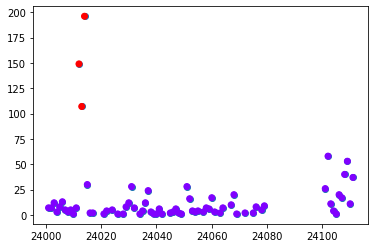

In [ ]:
#try area with job count (K-means)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
#Declare feature vector and target variable ¶
plt.scatter(AJ['area'],AJ['job_count'])
x = AJ[['area', 'job_count']]
kmeans = KMeans(2)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = AJ.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['area'],data_with_clusters['job_count'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
nn=pd.DataFrame(data_with_clusters['Clusters'])
nn.insert(1, "area",data_with_clusters['area'].values, True)
nn.insert(2, "job_count",AJ['job_count'].values, True)
nn

,Clusters,area,job_count
0,0,24105,1
1,0,24049,1
2,0,24042,1
3,0,24040,1
4,0,24039,1
...,...,...,...
66,0,24109,53
67,0,24102,58
68,1,24013,107
69,1,24012,149


In [ ]:
dk1=pd.DataFrame(data, columns=['area','cost'])
dk1
#the cost with area

,area,cost
0,24101,4
1,24101,1
2,24101,4
3,24101,3
4,24101,3
...,...,...
1121,24051,3
1122,24052,4
1123,24052,2
1124,24052,3


In [ ]:
dk=pd.crosstab(index=dk1["cost"], columns=dk1["area"],margins=True ) 
dk
#frequency table for cost with area
#كوست حوض

area,24001,24002,24003,24004,24005,24006,24007,24008,24009,24010,...,24103,24104,24105,24106,24107,24108,24109,24110,24111,All
cost,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,1,2,1,0,6,2,0,34
2,4,1,3,1,3,5,0,2,0,0,...,0,0,0,3,1,8,13,0,6,197
3,2,4,5,0,4,6,1,1,2,1,...,6,2,0,7,9,19,18,2,10,405
4,1,1,3,0,0,1,3,0,1,0,...,4,1,0,6,3,10,15,4,14,362
5,0,1,1,2,0,1,1,0,2,0,...,0,1,0,2,3,3,1,3,7,128
All,7,7,12,3,8,13,5,3,5,1,...,11,4,1,20,17,40,53,11,37,1126


In [ ]:
#find the cost sum for every area 
dk2 = dk1.groupby(['area']).agg({'cost': 'sum'})
#add the cost number to th data frame 
dk2.insert(1, "cost_count",dk.loc['All'], True)

In [ ]:
#the mean cost for every area
dk3 = dk2['cost']/dk2['cost_count']
dk2.insert(2, "cost_avg",dk3, True)
dk4=dk2.iloc[:,:0]
#collect all i want to use in one datafram
dk5=pd.DataFrame(dk4.index, columns=['area'])
dk2.insert(3, "area",dk5, True)
dk2.reset_index(inplace = True, drop = True)
dk2.rename(columns = {'cost_count':'job_count'}, inplace = True)

In [ ]:
dk2

,cost,job_count,cost_avg,area
0,18,7,2.571429,24001
1,23,7,3.285714,24002
2,38,12,3.166667,24003
3,12,3,4.000000,24004
4,19,8,2.375000,24005
...,...,...,...,...
66,57,17,3.352941,24107
67,128,40,3.200000,24108
68,151,53,2.849057,24109
69,39,11,3.545455,24110


In [ ]:
#k-mean (area , cost avg ,job num)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = dk2.iloc[:,1:4]
X

,job_count,cost_avg,area
0,7,2.571429,24001
1,7,3.285714,24002
2,12,3.166667,24003
3,3,4.000000,24004
4,8,2.375000,24005
...,...,...,...
66,17,3.352941,24107
67,40,3.200000,24108
68,53,2.849057,24109
69,11,3.545455,24110


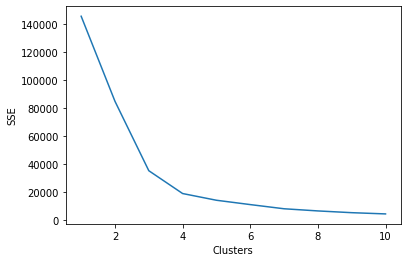

In [ ]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
dk2['cluster'] = y  
# the above step adds extra column indicating the cluster number for each country

In [ ]:
data1 = dk2[dk2.cluster==0]
data2 = dk2[dk2.cluster==1]
data3 = dk2[dk2.cluster==2]
data4 = dk2[dk2.cluster==3]

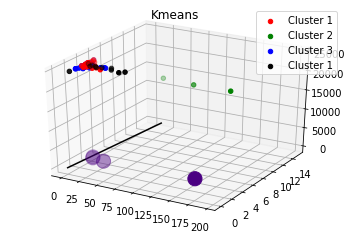

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 30000)
yline = np.linspace(0, 15, 30000)
zline = np.linspace(0, 15, 30000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.job_count, data1.cost_avg, data1.area, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.job_count,data2.cost_avg,data2.area,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.job_count, data3.cost_avg, data3.area, c='blue', label = 'Cluster 3')
kplot.scatter3D(data4.job_count, data4.cost_avg, data4.area, c='black', label = 'Cluster 1')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

In [ ]:
dk2

,cost,job_count,cost_avg,area,cluster
0,18,7,2.571429,24001,2
1,23,7,3.285714,24002,2
2,38,12,3.166667,24003,2
3,12,3,4.000000,24004,2
4,19,8,2.375000,24005,2
...,...,...,...,...,...
66,57,17,3.352941,24107,3
67,128,40,3.200000,24108,3
68,151,53,2.849057,24109,3
69,39,11,3.545455,24110,3


In [ ]:
list1=[]
Tlist1=dk2.loc[dk2['cluster'] == 0]
list1=Tlist1['area'].values
list1

array([24038, 24039, 24040, 24041, 24042, 24045, 24046, 24047, 24048,
       24049, 24051, 24052, 24053, 24054, 24055, 24057, 24058, 24059,
       24060, 24061, 24063, 24064, 24067, 24068, 24069, 24072, 24075,
       24076, 24078, 24079])

In [ ]:
list2=[]
Tlist2=dk2.loc[dk2['cluster'] == 1]
list2=Tlist2['area'].values
list2

array([24012, 24013, 24014])

In [ ]:
list3=[]
Tlist3=dk2.loc[dk2['cluster'] == 2]
list3=Tlist3['area'].values
list3

array([24001, 24002, 24003, 24004, 24005, 24006, 24007, 24008, 24009,
       24010, 24011, 24015, 24016, 24017, 24021, 24022, 24024, 24026,
       24028, 24029, 24030, 24031, 24032, 24034, 24035, 24036, 24037])

In [ ]:
list4=[]
Tlist4=dk2.loc[dk2['cluster'] == 3]
list4=Tlist4['area'].values
list4

array([24101, 24102, 24103, 24104, 24105, 24106, 24107, 24108, 24109,
       24110, 24111])

In [ ]:
'''# areas classification 
# according to range number of buisness in a group of areas
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
count=0
for j in sortedBuisness:
  if j > 0 and j <= 10 :
    list1.append(Array3[count])
  elif j > 10 and j <= 30 :
    list2.append(Array3[count])
  elif j > 30 and j <= 60 :
    list3.append(Array3[count])
  elif j > 60 and j <= 100 :
    list4.append(Array3[count])
  elif j > 100 :
    list5.append(Array3[count])
  count=count+1
print("list1(1-10)     =",list1)
print("list2(10-30)    =",list2)
print("list3(30-60)    =",list3)
print("list4(60-100)   =",list4)
print("list5(100<)     =",list5)'''

'# areas classification \n# according to range number of buisness in a group of areas\nlist1 = []\nlist2 = []\nlist3 = []\nlist4 = []\nlist5 = []\ncount=0\nfor j in sortedBuisness:\n  if j > 0 and j <= 10 :\n    list1.append(Array3[count])\n  elif j > 10 and j <= 30 :\n    list2.append(Array3[count])\n  elif j > 30 and j <= 60 :\n    list3.append(Array3[count])\n  elif j > 60 and j <= 100 :\n    list4.append(Array3[count])\n  elif j > 100 :\n    list5.append(Array3[count])\n  count=count+1\nprint("list1(1-10)     =",list1)\nprint("list2(10-30)    =",list2)\nprint("list3(30-60)    =",list3)\nprint("list4(60-100)   =",list4)\nprint("list5(100<)     =",list5)'

In [ ]:
acc=sorted.drop("All", axis=1)

In [ ]:
#take the areas from list1 and show business in each area
x1 = len(list1)
rows, cols = (x1, 92)
matrix1= [[0 for i in range(cols)] for j in range(rows)]
for i  in range(x1):
  k=list1[i]
  matrix1[i] = acc.loc[k]
m1=pd.DataFrame(matrix1)
#list2 --> m2
x2 = len(list2)
rows, cols = (x2, 92)
matrix2= [[0 for i in range(cols)] for j in range(rows)]
for i  in range(x2):
  k=list2[i]
  matrix2[i] = acc.loc[k]
m2=pd.DataFrame(matrix2)
#list3 -->m3
x3 = len(list3)
rows, cols = (x3, 92)
matrix3= [[0 for i in range(cols)] for j in range(rows)]
for i  in range(x3):
  k=list3[i]
  matrix3[i] = acc.loc[k]
m3=pd.DataFrame(matrix3)
#list4 -->m4
x4 = len(list4)
rows, cols = (x4, 92)
matrix4= [[0 for i in range(cols)] for j in range(rows)]
for i  in range(x4):
  k=list4[i]
  matrix4[i] = acc.loc[k]
m4=pd.DataFrame(matrix4)

In [ ]:
#find the max with max_id(the area)  -->m1max
maxValueIndex = m1.idxmax()
m1max=pd.DataFrame(maxValueIndex)
m1max['max'] = m1.max()
m1max.rename(columns = {0:'max_id'},inplace = True)
#remove max = 0 ... -->m1max1
a1=[]
for i in  range(92):
  val =m1max['max'] .iloc[i]
  if val == 0:
    a1.append(i)
m1max1 = m1max.drop(m1max.index[a1])
m1max1

,max_id,max
business_number,,
1010,24041,1
1071,24060,3
1073,24047,1
1079,24063,1
1410,24064,1
1511,24041,1
1709,24068,1
2159,24051,1
2220,24067,1


In [ ]:
#find the max with max_id(the area) -->m2max
maxValueIndex2 = m2.idxmax()
m2max=pd.DataFrame(maxValueIndex2)
m2max['max'] = m2.max()
m2max.rename(columns = {0:'max_id'},inplace = True)
#remove max = 0 ... -->m2max2
a2=[]
for i in  range(92):
  val =m2max['max'] .iloc[i]
  if val == 0:
    a2.append(i)
m2max2 = m2max.drop(m2max.index[a2])
m2max

,max_id,max
business_number,,
1010,24012,3
1030,24012,2
1050,24012,1
1071,24012,4
1073,24014,3
...,...,...
9521,24012,6
9522,24014,3
9529,24012,1


In [ ]:
#find the max with max_id(the area)  -->m3max
maxValueIndex3 = m3.idxmax()
m3max=pd.DataFrame(maxValueIndex3)
m3max['max'] = m3.max()
m3max.rename(columns = {0:'max_id'},inplace = True)
#remove max = 0 ... -->m3max3
a3=[]
for i in  range(92):
  val =m3max['max'] .iloc[i]
  if val == 0:
    a3.append(i)
m3max3 = m3max.drop(m3max.index[a3])
m3max3
#ماكس مهنه في حوض

,max_id,max
business_number,,
1010,24015,5
1030,24030,2
1050,24036,1
1071,24004,1
1073,24015,2
1079,24002,1
1410,24009,1
1709,24015,1
2511,24007,1


In [ ]:
#find the max with max_id(the area) -->m4max
maxValueIndex4 = m4.idxmax()
m4max=pd.DataFrame(maxValueIndex4)
m4max['max'] = m4.max()
m4max.rename(columns = {0:'max_id'},inplace = True)
#remove max = 0 ... -->m4max4
a4=[]
for i in  range(92):
  val =m4max['max'].iloc[i]
  if val == 0:
    a4.append(i)
m4max4 = m4max.drop(m4max.index[a4])
m4max4

,max_id,max
business_number,,
1010,24109,2
1030,24106,1
1071,24111,4
1073,24104,1
1079,24108,1
1520,24103,1
1622,24102,2
1709,24107,1
2511,24102,1


In [ ]:
#first step predicting how much i need business in each area
#area_need =(max_number-n)/max_number
buss = df2.drop_duplicates()[['business_number']].to_numpy()
d1 = pd.DataFrame(data, columns=['area'])
area = d1.drop_duplicates()[['area']].to_numpy()
for r in range(92):
  if r==0:
    d8 = pd.DataFrame(columns=buss[r], index=list1)
  else:
    d8.insert(r, buss[r],0, True)
area_buss1=d8

for r in range(92):
  if r==0:
    d9 = pd.DataFrame(columns=buss[r], index=list2)
  else:
    d9.insert(r, buss[r],0, True)
area_buss2=d9

for r in range(92):
  if r==0:
    d10 = pd.DataFrame(columns=buss[r], index=list3)
  else:
    d10.insert(r, buss[r],0, True)
area_buss3=d10

for r in range(92):
  if r==0:
    d11 = pd.DataFrame(columns=buss[r], index=list4)
  else:
    d11.insert(r, buss[r],0, True)
area_buss4=d11


In [ ]:
area_buss1

,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
24038,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24039,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24040,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24041,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24042,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24045,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24046,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24047,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24048,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24049,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=list(area_buss1.columns)
y=list(area_buss1.index)
r1=sorted.loc[y,x]
r1


business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24040,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24041,1,0,0,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
24042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24045,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24047,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=list(area_buss2.columns)
y=list(area_buss2.index)
r2=sorted.loc[y,x]
r2

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24012,3,2,0,3,3,3,5,54,4,0,...,0,0,0,0,0,0,0,0,0,0
24013,0,2,0,0,7,1,1,65,4,0,...,0,0,0,0,0,0,0,0,0,0
24014,0,10,3,0,22,2,10,89,7,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=list(area_buss3.columns)
y=list(area_buss3.index)
r3=sorted.loc[y,x]
r3

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24001,2,0,0,1,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24002,0,0,0,1,2,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
24003,0,0,0,1,2,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
24004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24005,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
24006,0,0,0,0,0,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
24007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24009,0,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=list(area_buss4.columns)
y=list(area_buss4.index)
r4=sorted.loc[y,x]
r4

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24101,1,1,1,2,6,1,3,3,1,2,...,0,0,0,0,0,0,0,0,0,0
24102,1,0,1,0,6,0,8,17,2,0,...,0,0,0,0,0,0,0,0,0,0
24103,1,0,0,0,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24104,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24106,0,1,0,0,4,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0
24107,0,0,0,0,1,1,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
24108,1,0,1,3,3,0,2,11,0,0,...,0,0,0,0,0,0,0,0,0,0
24109,2,0,0,4,20,2,0,4,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
m1=m1max.drop(labels='max_id',axis=1)
m2=m2max.drop(labels='max_id',axis=1)
m3=m3max.drop(labels='max_id',axis=1)
m4=m4max.drop(labels='max_id',axis=1)

In [ ]:
e=0
for i in r1.index:
  for j in r1.columns:
    n=r1.loc[i,j]
    max=m1.loc[j,'max']
    if  max!=0:
      p=(max-n)/max
      r1.loc[i,j]=p
    else:
      r1.loc[i,j]=0
    
    
r1

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24038,1,1,1,1.000000,1.000000,1.0,1.0,1.0,1,0,...,0,1,1,1,1.0,1,1,1,1,1
24039,1,1,1,1.000000,1.000000,1.0,1.0,1.0,1,0,...,0,1,1,1,1.0,1,1,1,1,1
24040,1,1,1,1.000000,0.916667,1.0,1.0,1.0,1,0,...,0,1,1,1,1.0,1,1,1,1,1
24041,0,1,1,0.333333,1.000000,1.0,1.0,0.8,1,0,...,0,0,1,1,1.0,1,1,1,1,1
24042,1,1,1,1.000000,1.000000,1.0,1.0,1.0,1,0,...,0,1,1,1,1.0,1,1,1,1,1
24045,1,1,1,1.000000,1.000000,1.0,1.0,0.8,1,0,...,0,1,1,1,1.0,1,1,1,1,1
24046,1,1,1,1.000000,1.000000,1.0,1.0,1.0,1,0,...,0,1,1,1,1.0,1,1,1,1,1
24047,1,1,0,0.666667,1.000000,1.0,1.0,1.0,1,0,...,0,1,0,1,1.0,1,1,1,1,1
24048,1,1,1,1.000000,1.000000,1.0,1.0,1.0,1,0,...,0,1,1,1,1.0,1,1,1,1,1


In [ ]:
e=0
for i in r2.index:
  for j in r2.columns:
    n=r2.loc[i,j]
    max=m2.loc[j,'max']
    if  max!=0:
      p=(max-n)/max
      r2.loc[i,j]=p
    else:
      r2.loc[i,j]=0
   
    
r2

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24012,0,0.8,1,0,0.863636,0.000000,0.5,0.393258,0.428571,0,...,0,0,0,0,0,0,0,0,0,0
24013,1,0.8,1,1,0.681818,0.666667,0.9,0.269663,0.428571,0,...,0,0,0,0,0,0,0,0,0,0
24014,1,0.0,0,1,0.000000,0.333333,0.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
e=0
for i in r3.index:
  for j in r3.columns:
    n=r3.loc[i,j]
    max=m3.loc[j,'max']
    if  max!=0:
      p=(max-n)/max
      r3.loc[i,j]=p
    else:
      r3.loc[i,j]=0
    
    
r3

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24001,0.6,1,1,0,1.000000,1.000000,0.0,0.857143,1,0,...,1,0,0,0,0,0,0,0,0,0
24002,1.0,1,1,0,0.666667,1.000000,1.0,0.714286,0,0,...,1,0,0,0,0,0,0,0,0,0
24003,1.0,1,1,0,0.666667,1.000000,0.5,0.857143,0,0,...,1,0,0,0,0,0,0,0,0,0
24004,1.0,1,1,1,0.833333,1.000000,1.0,1.000000,1,0,...,1,0,0,0,0,0,0,0,0,0
24005,1.0,1,1,1,1.000000,1.000000,0.5,0.714286,1,0,...,1,0,0,0,0,0,0,0,0,0
24006,1.0,1,1,1,1.000000,1.000000,0.0,0.714286,0,0,...,1,0,0,0,0,0,0,0,0,0
24007,1.0,1,1,1,1.000000,1.000000,1.0,1.000000,1,0,...,1,0,0,0,0,0,0,0,0,0
24008,1.0,1,1,1,1.000000,1.000000,1.0,1.000000,1,0,...,1,0,0,0,0,0,0,0,0,0
24009,1.0,1,1,1,0.666667,1.000000,1.0,1.000000,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
e=0
for i in r4.index:
  for j in r4.columns:
    n=r4.loc[i,j]
    max=m4.loc[j,'max']
    if  max!=0:
      p=(max-n)/max 
      r4.loc[i,j]=p
    else:
      r4.loc[i,j]=0
    
r4

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,...,4774,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,
24101,0.5,0,0,0.50,0.70,0.5,0.625,0.823529,0.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
24102,0.5,1,0,1.00,0.70,1.0,0.000,0.000000,0.333333,1.0,...,0,0,0,0,0,0,0,0,0,0
24103,0.5,1,1,1.00,1.00,0.5,0.750,0.941176,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
24104,1.0,1,1,1.00,1.00,1.0,0.875,1.000000,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
24105,1.0,1,1,1.00,1.00,1.0,1.000,1.000000,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
24106,1.0,0,1,1.00,0.80,1.0,0.875,1.000000,0.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
24107,1.0,1,1,1.00,0.95,0.5,1.000,0.882353,0.333333,1.0,...,0,0,0,0,0,0,0,0,0,0
24108,0.5,1,0,0.25,0.85,1.0,0.750,0.352941,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
24109,0.0,1,1,0.00,0.00,0.0,1.000,0.764706,0.666667,0.5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#to find the areas have all the streets types
df98 = pd.DataFrame(data, columns=['area'])
area_street_array = df98.drop_duplicates()[['area']].to_numpy()
for t in range(71):
  if t==0:
    df99 = pd.DataFrame(columns=area_street_array[t], index=range(3))
  else:
    df99.insert(t, area_street_array[t],0, True)
df99.rename(index = {0: "main_street", 1:"main-substreet",2:"substreet"},inplace = True)
df3 = pd.DataFrame(data, columns=['street_number'])
street =df3[['street_number']].to_numpy()
a = df98[['area']].to_numpy()
rows, cols = (2, 1056)
matrix= [[0 for i in range(cols)] for j in range(rows)]
count1 =0
count2 =0
count3 =0
st11 =[0 for x in range(71)]
st22 =[0 for x in range(71)]
st33 =[0 for x in range(71)]
for j in range(1056):
  l = street[j]%10
  matrix[0][j] = l
  matrix[1][j] = a[j]
for c in range(71):
  k=area_street_array[c]
  count1=0
  count2=0
  count3=0
  for p in range(1056):
    if k == matrix[1][p] :
      if matrix[0][p] == 1:
        count1 = 1
      if matrix[0][p] == 2:
        count2 = 1
      elif matrix [0][p] == 3:
        count3 =  1
  st11[c]=count1
  st22[c]=count2
  st33[c]=count3

df99.loc["main_street"] = st11
df99.loc["main-substreet"] = st22
df99.loc["substreet"] =st33

df99
df99.style
#حوض شارع

,24101,24102,24103,24104,24105,24106,24107,24108,24109,24110,24111,24005,24001,24002,24003,24004,24006,24007,24008,24009,24010,24011,24012,24013,24014,24015,24016,24017,24021,24022,24024,24026,24028,24029,24030,24031,24032,24034,24035,24036,24037,24038,24039,24040,24041,24042,24045,24046,24047,24048,24049,24051,24052,24053,24054,24055,24057,24058,24059,24060,24061,24063,24064,24067,24068,24069,24072,24075,24076,24078,24079
main_street,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1
main-substreet,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1
substreet,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
from pandas.core.frame import DataFrame
def streets_classifier(area,street_cat,cost):
  k = 0 
  area_val = []  
  street_val = []

  # sort business values
  b1 = data[['business_number']].to_numpy()
  b2 = DataFrame(b1)
  b3 = b2.drop_duplicates()
  b4 = b3.sort_values(by=0)
  list_b2 = b4.values.tolist()
  #display(list_b2)
  #areas classification
  # list 1 
  for i in list1:
    if ( area == i ):
      for j in r1.index:
        k=k+1
        if ( area == j):
          area_val = r1.iloc[k-1,0:]
          AV_list = area_val.to_list()
         # print(area_val.to_list())
# list 2 
  for i in list2:
    if ( area == i ):
      for j in r2.index:
        k=k+1
        if ( area == j):
          area_val = r2.iloc[k-1,0:]
          AV_list = area_val.to_list()
          #display (area_val.to_list())
# list 3 

  for i in list3:
    if ( area == i ):
      for j in r3.index:
        k=k+1
        if ( area == j):
          area_val = r3.iloc[k-1,0:]
          AV_list = area_val.to_list()
          #display (area_val.to_list())  
# list 4
  for i in list4:
    if ( area == i ):
      for j in r4.index:
        k=k+1
        if ( area == j):
          area_val = r4.iloc[k-1,0:]
          AV_list = area_val.to_list()
          #display (area_val.to_list())

  # street classification :         
  # df5 -> dataframe of the streets category probabilities 
  k = 0 
  for q in df5.index:
    k=k+1
    if ( street_cat == q ):
      j = df5.iloc[k-1,0:]
      street_val = j.iloc[0:]
      SV_list = street_val.to_list()
      #display (street_val.to_list())
  
  # cost classification : 
  # the pobabilites are in dataframe d4 
  cost_val = []
  cost_val2 = [] 
  cost1 = 0
  # cost ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
  k = 0 
  for i in d4.index:
    cost1 = i 
    if ( cost == i ):
      #print(i)
      if (i == 5 ):
        cost_val5 = d4.iloc[i-1,0:]
        CV_list5 = cost_val5.to_list()
      elif (i == 4):
        cost_val4 = d4.iloc[i-1,0:]
        CV_list4 = cost_val4.to_list()
        cost_val5 = d4.iloc[i,0:]
        CV_list5 = cost_val5.to_list()
      elif (i == 3):
        cost_val3 = d4.iloc[i-1,0:]
        CV_list3 = cost_val3.to_list()
        cost_val4 = d4.iloc[i,0:]
        CV_list4 = cost_val4.to_list()
        cost_val5 = d4.iloc[i+1,0:]
        CV_list5 = cost_val5.to_list()
      elif (i == 2):
        cost_val2 = d4.iloc[i-1,0:]
        CV_list2 = cost_val2.to_list()
        cost_val3 = d4.iloc[i,0:]
        CV_list3 = cost_val3.to_list()
        cost_val4 = d4.iloc[i+1,0:]
        CV_list4 = cost_val4.to_list()
        cost_val5 = d4.iloc[i+2,0:]
        CV_list5 = cost_val5.to_list()
      elif (i == 1):
        cost_val = d4.iloc[i-1,0:]
        CV_list = cost_val.to_list()
        cost_val2 = d4.iloc[i,0:]
        CV_list2 = cost_val2.to_list()
        cost_val3 = d4.iloc[i+1,0:]
        CV_list3 = cost_val3.to_list()
        cost_val4 = d4.iloc[i+2,0:]
        CV_list4 = cost_val4.to_list()
        cost_val5 = d4.iloc[i+3,0:]
        CV_list5 = cost_val5.to_list()
      else :
        print(" bad input ")
      #display (CV_list)
 # display(CV_list)

  # we got the vectors we need 
  # sort the vectors in one matrix 
  mul_list = []
  mul_list3 = []
  counter1 = 0 
 # print(SV_list)
  for i in range(len(AV_list)):
    mul_list.append(AV_list[i]*SV_list[i])
 # print(mul_list)
  rslt = DataFrame(mul_list)
  mul_list1 = rslt#.sort_values(by=0)
  mul_list2 =  mul_list1.values.tolist()

  MAT1 = [[ 0 for i in range (5)]  for i in range (92)]


 # for i in mul_list2:
  #  MAT1[1].append(i) 
  h = 0 
  for item in mul_list2:
   for h in item:
      float(h)
      MAT1[0].append(h)
  i = 0 
  if ( cost == 1):
    for i in CV_list:
      MAT1[1].append(i)
    for i in CV_list2:
      MAT1[2].append(i)
    for i in CV_list3:
      MAT1[3].append(i)
    for i in CV_list4:
      MAT1[4].append(i)
    for i in CV_list5:
      MAT1[5].append(i)
    df_mat = DataFrame(MAT1)
    df_mat1 = df_mat.iloc[:6,0:]
    df_mat1 = df_mat1.rename(index={ 0 : 'streetArea_prob',1 : 'cost_prob_1',2 : 'cost_prob_2',3 : 'cost_prob_3',4 : 'cost_prob_4' ,5 : 'cost_prob_5'})

  elif ( cost == 2 ):
    for i in CV_list2:
      MAT1[1].append(i)
    for i in CV_list3:
      MAT1[2].append(i)
    for i in CV_list4:
      MAT1[3].append(i)
    for i in CV_list5:
      MAT1[4].append(i)
    df_mat = DataFrame(MAT1)
    df_mat1 = df_mat.iloc[:5,0:]
    df_mat1 = df_mat1.rename(index={ 0 : 'streetArea_prob', 1 : 'cost_prob_2',2 : 'cost_prob_3',3 : 'cost_prob_4',4 : 'cost_prob_5'})

  elif ( cost == 3 ):
    for i in CV_list3:
      MAT1[1].append(i)
    for i in CV_list4:
      MAT1[2].append(i)
    for i in CV_list5:
      MAT1[3].append(i)
    df_mat = DataFrame(MAT1)
    df_mat1 = df_mat.iloc[:4,0:]
    df_mat1 = df_mat1.rename(index={ 0 : 'streetArea_prob', 1 : 'cost_prob_3',2 : 'cost_prob_4',3 : 'cost_prob_5'})


  elif ( cost == 4 ):
    for i in CV_list4:
      MAT1[1].append(i)
    for i in CV_list5:
      MAT1[2].append(i)
    df_mat = DataFrame(MAT1)
    df_mat1 = df_mat.iloc[:3,0:]
    df_mat1 = df_mat1.rename(index={ 0 : 'streetArea_prob', 1 : 'cost_prob_4',2 : 'cost_prob_5'})

  elif ( cost == 5 ):
     for i in CV_list5:
       MAT1[1].append(i)
     df_mat = DataFrame(MAT1)
     df_mat1 = df_mat.iloc[:2,0:]
     df_mat1 = df_mat1.rename(index={ 0 : 'streetArea_prob', 1 : 'cost_prob_5'})

  # the result is the multipliciton of area and street probabilities
 # print(df_mat1)
###################################################

  C4 = 5
  for x in df5.columns:
    df_mat1 = df_mat1.rename(columns={ C4 : x})
    C4 += 1
  df_mat1 =  df_mat1.drop([0,1,2,3,4], axis = 1)

   #delete coloumn have the streetArea_prob =0 
  for i in df_mat1.index:
    for j in df_mat1.columns:
      if df_mat1.loc['streetArea_prob',j] == 0 :
         df_mat1.drop(j, inplace=True, axis=1)


  df_mat1=df_mat1.sort_values(by = 'streetArea_prob', axis = 1, ascending = False)
 
  c=df_mat1.shape[1]
  index0 = list(range(1, c+1))
  s=len(df_mat1)
  df_mat1.loc[s]=index0
 #print (s)
  df_mat1=df_mat1.rename(index={s : "Index_number"})
 # df_mat1[len(df_mat1)] = 'Index number'
  if cost==1:
   new_index1 = ['Index_number', 'streetArea_prob', 'cost_prob_1',  'cost_prob_2', 'cost_prob_3', 'cost_prob_4', 'cost_prob_5']
   df_mat1=df_mat1.reindex(new_index1)
  if cost==2:
    new_index2 = ['Index_number', 'streetArea_prob',  'cost_prob_2', 'cost_prob_3', 'cost_prob_4', 'cost_prob_5']
    df_mat1=df_mat1.reindex(new_index2)
  if cost==3:
    new_index3 = ['Index_number', 'streetArea_prob', 'cost_prob_3', 'cost_prob_4', 'cost_prob_5']
    df_mat1=df_mat1.reindex(new_index3)
  if cost==4:
   new_index4 = ['Index_number', 'streetArea_prob',  'cost_prob_4', 'cost_prob_5']
   df_mat1=df_mat1.reindex(new_index4)
  if cost==5:
   new_index5 = ['Index_number', 'streetArea_prob', 'cost_prob_5']
   df_mat1=df_mat1.reindex(new_index5)


  

  return df_mat1

In [ ]:
streets_classifier(24012,'main_street',5).style
#test randomly

,4723,1430,5510,3250,4652,4630,3211,4764,4721,4711,8219,4662,4321,9329,9522,1073,4620,4772,4759,4771,4773,7420,4761
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
streetArea_prob,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.757895,0.750000,0.714286,0.518182,0.500000,0.500000,0.500000,0.500000,0.500000,0.421053,0.400000,0.391304,0.377193,0.335148,0.318367,0.250000,0.154762
cost_prob_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.001776,0.023091,0.000000,0.005329,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776


In [ ]:
# streets_classifier(24013,'main_street',1).style #test10
# This function takes the same parameters as the first function 
# and it takes the result of the previous function and drop the columns that all the cost probability init is equals to zero.

def cost_classifier (Area1,street1,cost1):
  result1 = streets_classifier(Area1,street1,cost1)

  # classifing cost 5
  if cost1 == 5: 
    for i in result1.iloc[4:,0:]:
      for j in result1.columns:
        if result1.loc['cost_prob_5',j] == 0 :
          result1.drop(j, inplace=True, axis=1)
  # cost 4
  if cost1 == 4: 
    for i in result1.iloc[3:,0:]:
      for j in result1.columns:
        if result1.loc['cost_prob_4',j] == 0 and result1.loc['cost_prob_5',j] == 0:
          result1.drop(j, inplace=True, axis=1)
  # cost 3
  if cost1 == 3: 
    for i in result1.iloc[2:,0:]:
      for j in result1.columns:
        if result1.loc['cost_prob_3',j] == 0 and result1.loc['cost_prob_4',j] == 0 and result1.loc['cost_prob_5',j] == 0 :
          result1.drop(j, inplace=True, axis=1)
  # cost 2 
  if cost1 == 2: 
    for i in result1.iloc[1:,0:]:
      for j in result1.columns:
        if result1.loc['cost_prob_2',j] == 0 and result1.loc['cost_prob_3',j] == 0 and result1.loc['cost_prob_4',j] == 0 and result1.loc['cost_prob_5',j] == 0 :
          result1.drop(j, inplace=True, axis=1)

  return result1
cost_classifier(24012,'main_street',1)

,4723,1430,5510,3250,4652,4630,3211,4764,4721,4711,...,9329,9522,1073,4620,4772,4759,4771,4773,7420,4761
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,14.000000,15.00000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
streetArea_prob,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.757895,0.750000,0.714286,0.518182,...,0.500000,0.50000,0.421053,0.400000,0.391304,0.377193,0.335148,0.318367,0.250000,0.154762
cost_prob_1,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329
cost_prob_2,0.001776,0.002664,0.008881,0.000000,0.005329,0.000888,0.000888,0.016874,0.000000,0.001776,...,0.000888,0.00000,0.000888,0.000888,0.000000,0.000000,0.000000,0.000888,0.000000,0.006217
cost_prob_3,0.000000,0.002664,0.000000,0.000000,0.000888,0.000000,0.000000,0.035524,0.000888,0.004440,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.002664,0.000888,0.000000,0.000000,0.000888
cost_prob_4,0.000000,0.000000,0.000888,0.000000,0.000888,0.000000,0.004440,0.053286,0.000000,0.005329,...,0.000888,0.00444,0.000000,0.000888,0.000888,0.001776,0.000000,0.000000,0.000888,0.002664
cost_prob_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.001776,0.023091,0.000000,0.005329,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776


In [ ]:
def area_find(business):
 
 ww1= r1[[business]]
 ww2= r2[[business]]
 ww3= r3[[business]]
 ww4= r4[[business]]
 www=pd.concat([ww1,ww2,ww3,ww4], axis=0)
 www=www.sort_values(by=[business] ,ascending=False)
 xx=df5[[business]]
 m1=xx.loc['main_street',business]
 m2=xx.loc['main-substreet',business]
 m3=xx.loc['substreet',business]
 main=[]
 main_sub=[]
 sub=[]

 for i in www.index:
  if www.loc[i,business] == 0 :
    www=www.drop(i)
 for i in www.index:
   for j in www.columns:
     main.append(www.loc[i,j]*m1)
     main_sub.append(www.loc[i,j]*m2)
     sub.append(www.loc[i,j]*m3)

 www["Needs in main street"] = main
 www["Needs in main_sub street"] = main_sub
 www["Needs in sub street"] = sub
 www=www.drop([business], axis = 1)

 return www

In [ ]:
x=area_find(4711)
x.style

business_number,Needs in main street,Needs in main_sub street,Needs in sub street
area,,,
24038,0.600000,0.386667,0.013333
24105,0.600000,0.386667,0.013333
24072,0.600000,0.386667,0.013333
24075,0.600000,0.386667,0.013333
24079,0.600000,0.386667,0.013333
24001,0.600000,0.386667,0.013333
24039,0.600000,0.386667,0.013333
24005,0.600000,0.386667,0.013333
24006,0.600000,0.386667,0.013333


## **Test on List 1**

In [ ]:
#to find the business needs in this area (list1))24032-24053 
q1=dlast.loc[[24052]]#محلات متوفره في الحوض 
for i in q1.index:
  for j in q1.columns:
    if q1.loc[i,j]==0 :
      q1.drop(j, inplace=True, axis=1)

q1.style

business_number,1071,1073,4520,4530,4711,4771,4773,9521,9602,All
area,,,,,,,,,,
24052,1,1,2,4,4,1,1,1,1,16


In [ ]:
rr1=r1.loc[[24052]]# محلات المحتاجه في الحوض  بناء على الليست \
for i in rr1.index:
  for j in rr1.columns:
    if rr1.loc[i,j]==0 :
      rr1.drop(j, inplace=True, axis=1)

rr1.style

business_number,1010,3211,4630,4663,4711,4752,4759,4771,5610,9521,2511,4510,4721,4753,4761,4530,5630,4772,9522,1709,1079,5210,4764,7911,1071,7420,8549,4610,1410,2159,4662,7912,7020,9329,5510,2591,1511,3311,2670,9312,7410,4322,2220,2592,4539
area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24052,1,1,1,1.000000,0.666667,1.000000,1.000000,0.800000,1,0.500000,1,1.000000,1,1,1,0.333333,1,1,1,1,1,1,1,1,0.666667,1,1,1,1,1,1,1.000000,1,1,1,1,1,1,1,1.000000,1,1,1,1,1


In [ ]:
streets_classifier(24052 ,'main_street',1).style #test1

,4539,5630,2592,2220,4322,9312,2670,5510,4662,2159,4610,1709,3211,4630,4753,1010,4772,4759,9522,4764,4721,7912,4771,5610,4761,5210,1410,1079,7911,4510,1071,4752,2591,2511,9329,7020,4663,4711,8549,9521,4530,7420
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000
streetArea_prob,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.947368,0.900000,0.800000,0.791667,0.782609,0.754386,0.750000,0.750000,0.714286,0.714286,0.681787,0.625000,0.619048,0.600000,0.600000,0.583333,0.583333,0.571429,0.521739,0.500000,0.500000,0.500000,0.500000,0.500000,0.444444,0.400000,0.333333,0.312500,0.281250,0.250000
cost_prob_1,0.000888,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000888,0.003552,0.000000,0.000888,0.003552,0.000888,0.000000,0.008881,0.001776,0.001776,0.000000,0.003552,0.000888,0.000888,0.000888,0.007993,0.000000,0.000000,0.000000,0.016874,0.000000,0.000000,0.000000,0.000000,0.006217,0.011545,0.007993,0.000888,0.002664,0.000000,0.001776,0.000000,0.000000,0.000000,0.000888,0.000000,0.003552,0.001776,0.000000,0.000000,0.000000,0.000000
cost_prob_3,0.000888,0.000000,0.000000,0.001776,0.000888,0.000000,0.000000,0.000000,0.004440,0.010657,0.001776,0.000000,0.000000,0.000000,0.000888,0.003552,0.000000,0.002664,0.000000,0.035524,0.000888,0.002664,0.000888,0.000888,0.000888,0.006217,0.124334,0.000000,0.002664,0.000000,0.012433,0.007105,0.000000,0.000888,0.000000,0.000000,0.006217,0.004440,0.000000,0.000000,0.000888,0.000000
cost_prob_4,0.000888,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.002664,0.015986,0.001776,0.005329,0.004440,0.000000,0.000000,0.009769,0.000888,0.001776,0.004440,0.053286,0.000000,0.000888,0.000000,0.000000,0.002664,0.002664,0.104796,0.000000,0.003552,0.000000,0.007105,0.002664,0.002664,0.000000,0.000888,0.000000,0.005329,0.005329,0.001776,0.001776,0.000888,0.000888
cost_prob_5,0.003552,0.000000,0.001776,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.001776,0.000000,0.000000,0.001776,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.023091,0.000000,0.001776,0.000000,0.000000,0.001776,0.002664,0.020426,0.000000,0.003552,0.000888,0.003552,0.000888,0.000000,0.000000,0.000000,0.000888,0.005329,0.005329,0.000000,0.000888,0.000000,0.000000


In [ ]:
streets_classifier(24052,'main-substreet',1).style #test2

,7410,1511,3311,8549,4663,2511,7420,2591,9329,4752,4510,1079,1410,7911,4761,5610,4721,4711,4764,4759,5210,4753,9521,4772,1010,1071,7912,9522,4771,4630,3211,4530
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000
streetArea_prob,1.000000,1.000000,1.000000,0.666667,0.518519,0.500000,0.500000,0.500000,0.500000,0.464286,0.428571,0.416667,0.400000,0.333333,0.333333,0.300000,0.285714,0.257778,0.250000,0.245614,0.200000,0.200000,0.187500,0.173913,0.166667,0.144928,0.142857,0.125000,0.107216,0.100000,0.052632,0.052083
cost_prob_1,0.002664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.005329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.008881,0.001776,0.000000,0.000000,0.003552,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000888,0.007993,0.002664,0.006217,0.000000,0.000000,0.001776,0.016874,0.000000,0.011545,0.000888,0.000000,0.000000,0.007993,0.001776,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000
cost_prob_3,0.012433,0.000888,0.000888,0.000000,0.006217,0.000888,0.000000,0.000000,0.000000,0.007105,0.000000,0.000000,0.124334,0.002664,0.000888,0.000888,0.000888,0.004440,0.035524,0.002664,0.006217,0.000888,0.000000,0.000000,0.003552,0.012433,0.002664,0.000000,0.000888,0.000000,0.000000,0.000888
cost_prob_4,0.000888,0.000000,0.000000,0.001776,0.005329,0.000000,0.000888,0.002664,0.000888,0.002664,0.000000,0.000000,0.104796,0.003552,0.002664,0.000000,0.000000,0.005329,0.053286,0.001776,0.002664,0.000000,0.001776,0.000888,0.009769,0.007105,0.000888,0.004440,0.000000,0.000000,0.004440,0.000888
cost_prob_5,0.003552,0.000000,0.000888,0.000000,0.005329,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000,0.020426,0.003552,0.001776,0.000000,0.000000,0.005329,0.023091,0.000000,0.002664,0.000000,0.000888,0.000000,0.000000,0.003552,0.001776,0.000000,0.000000,0.000888,0.001776,0.000000


In [ ]:
streets_classifier(24052,'substreet',1).style #test3

,7020,7420,5210,7912,9522,7911,5610,4761,4772,1010,4663,4752,4771,4711
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000
streetArea_prob,0.500000,0.250000,0.200000,0.142857,0.125000,0.083333,0.075000,0.047619,0.043478,0.041667,0.037037,0.035714,0.010997,0.008889
cost_prob_1,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.005329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000000,0.000000,0.011545,0.000000,0.000000,0.002664,0.000000,0.006217,0.000000,0.007993,0.003552,0.000000,0.000000,0.001776
cost_prob_3,0.000000,0.000000,0.006217,0.002664,0.000000,0.002664,0.000888,0.000888,0.000000,0.003552,0.006217,0.007105,0.000888,0.004440
cost_prob_4,0.000000,0.000888,0.002664,0.000888,0.004440,0.003552,0.000000,0.002664,0.000888,0.009769,0.005329,0.002664,0.000000,0.005329
cost_prob_5,0.000888,0.000000,0.002664,0.001776,0.000000,0.003552,0.000000,0.001776,0.000000,0.000000,0.005329,0.000888,0.000000,0.005329


# **Test on list 2**

In [ ]:
#to find the business needs in this area (list2))24003-24031-24053
q2=dlast.loc[[24013]]#محلات متوفره في الحوض 
for i in q2.index:
  for j in q2.columns:
    if q2.loc[i,j]==0 :
      q2.drop(j, inplace=True, axis=1)

q2.style

business_number,1079,3211,4530,4620,4649,4652,4662,4711,4721,4741,4751,4752,4759,4761,4771,4772,4773,5610,7310,7420,7911,7912,8219,9521,9522,All
area,,,,,,,,,,,,,,,,,,,,,,,,,,
24013,1,2,1,1,1,1,1,7,1,1,1,1,1,3,65,3,4,1,1,1,1,1,2,4,1,107


In [ ]:
rr2=r2.loc[[24013]]# محلات المحتاجه في الحوض  بناء على الليست \
for i in rr2.index:
  for j in rr2.columns:
    if rr2.loc[i,j]==0 :
      rr2.drop(j, inplace=True, axis=1)

rr2.style

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,5610,9521,2511,4100,4761,7310,8121,4530,5630,1073,1030,4741,4772,9522,1079,4649,5210,4764,7911,5229,1071,4641,2159,4659,8020,8110,4662,7020,9000,9529,5310,4763,4620,7490,1050,4321,9329,3250,5510,1430,4723,1512
area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24013,1,0.800000,1,1,0.681818,0.666667,0.900000,0.269663,0.428571,0.750000,0.333333,1,1,0.250000,0.800000,1,0.500000,1.000000,1.000000,1.000000,0.750000,0.250000,0.666667,0.666667,0.500000,1,1,0.666667,1.000000,1.000000,1,1,1,1,1,0.750000,1,1,1,1,1,0.500000,1,1,1,1,1,1,1,1,1


In [ ]:
streets_classifier(24013,'main_street',1).style #test4

,4723,5630,1430,5510,3250,1050,4763,5310,9000,8110,8020,4659,2159,8121,4630,5229,1010,1071,3211,1030,4764,4662,4759,9529,1073,5210,4741,7310,9329,4321,7490,7020,2511,4641,9522,5610,4663,4649,4530,4711,4620,1079,7911,4752,4100,4773,4771,9521,4772,4761
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000
streetArea_prob,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.833333,0.791667,0.782609,0.757895,0.750000,0.750000,0.750000,0.678947,0.666667,0.631579,0.600000,0.571429,0.553846,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.468750,0.444444,0.437500,0.421875,0.409091,0.400000,0.388889,0.388889,0.333333,0.333333,0.318367,0.229816,0.208333,0.195652,0.154762
cost_prob_1,0.000000,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329
cost_prob_2,0.001776,0.003552,0.002664,0.008881,0.000000,0.000000,0.001776,0.000000,0.000888,0.000000,0.000000,0.000000,0.001776,0.000888,0.000888,0.000000,0.007993,0.001776,0.000888,0.003552,0.016874,0.001776,0.000000,0.011545,0.000888,0.011545,0.008881,0.000000,0.000888,0.000888,0.003552,0.000000,0.000000,0.000000,0.000000,0.000000,0.003552,0.004440,0.000000,0.001776,0.000888,0.000888,0.002664,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.006217
cost_prob_3,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.000888,0.010657,0.001776,0.000000,0.001776,0.003552,0.012433,0.000000,0.002664,0.035524,0.004440,0.002664,0.013321,0.000000,0.006217,0.013321,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.003552,0.000000,0.000888,0.006217,0.001776,0.000888,0.004440,0.000000,0.000000,0.002664,0.007105,0.002664,0.000000,0.000888,0.000000,0.000000,0.000888
cost_prob_4,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.000000,0.005329,0.000000,0.000000,0.000000,0.000000,0.015986,0.000000,0.000000,0.001776,0.009769,0.007105,0.004440,0.000000,0.053286,0.002664,0.001776,0.008881,0.000000,0.002664,0.001776,0.000000,0.000888,0.001776,0.005329,0.000000,0.000000,0.000888,0.004440,0.000000,0.005329,0.000888,0.000888,0.005329,0.000888,0.000000,0.003552,0.002664,0.000000,0.000000,0.000000,0.001776,0.000888,0.002664
cost_prob_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.001776,0.000000,0.000888,0.000000,0.000000,0.003552,0.001776,0.000000,0.023091,0.000000,0.000000,0.001776,0.000000,0.002664,0.003552,0.000888,0.000000,0.000888,0.001776,0.000888,0.000000,0.000000,0.000000,0.000000,0.005329,0.000888,0.000000,0.005329,0.000000,0.000000,0.003552,0.000888,0.000888,0.000000,0.000000,0.000888,0.000000,0.001776


In [ ]:
streets_classifier(24013,'main-substreet',1).style #test5

,1512,4100,4663,2511,9329,7490,4641,1073,9529,4752,1079,4711,1030,4764,5610,7911,4759,1071,5210,7310,4741,1010,9521,4620,4630,4773,4761,9522,4530,4649,4772,3211,4771
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000
streetArea_prob,1.000000,0.666667,0.518519,0.500000,0.500000,0.500000,0.500000,0.368421,0.333333,0.309524,0.277778,0.263636,0.250000,0.250000,0.225000,0.222222,0.221053,0.217391,0.200000,0.184615,0.178571,0.166667,0.125000,0.100000,0.100000,0.085714,0.083333,0.083333,0.078125,0.062500,0.043478,0.042105,0.036140
cost_prob_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000888,0.000000,0.003552,0.000000,0.000888,0.003552,0.000000,0.000888,0.011545,0.000000,0.000888,0.001776,0.003552,0.016874,0.000000,0.002664,0.000000,0.001776,0.011545,0.000000,0.008881,0.007993,0.000000,0.000888,0.000888,0.000888,0.006217,0.000000,0.000000,0.004440,0.000000,0.000888,0.000000
cost_prob_3,0.000000,0.002664,0.006217,0.000888,0.000000,0.000888,0.003552,0.000000,0.013321,0.007105,0.000000,0.004440,0.002664,0.035524,0.000888,0.002664,0.002664,0.012433,0.006217,0.000000,0.013321,0.003552,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.001776,0.000000,0.000000,0.000888
cost_prob_4,0.000000,0.000000,0.005329,0.000000,0.000888,0.005329,0.000888,0.000000,0.008881,0.002664,0.000000,0.005329,0.000000,0.053286,0.000000,0.003552,0.001776,0.007105,0.002664,0.000000,0.001776,0.009769,0.001776,0.000888,0.000000,0.000000,0.002664,0.004440,0.000888,0.000888,0.000888,0.004440,0.000000
cost_prob_5,0.000000,0.000888,0.005329,0.000000,0.000000,0.001776,0.000000,0.000000,0.001776,0.000888,0.000000,0.005329,0.000000,0.023091,0.000000,0.003552,0.000000,0.003552,0.002664,0.000888,0.003552,0.000000,0.000888,0.000000,0.000888,0.000000,0.001776,0.000000,0.000000,0.000888,0.000000,0.001776,0.000000


In [ ]:
streets_classifier(24013,'substreet',1).style #test6

,7020,4321,5210,5229,9522,7310,5610,7911,1010,4663,4773,4752,4761,4772,4711,4771
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000
streetArea_prob,0.500000,0.500000,0.200000,0.166667,0.083333,0.061538,0.056250,0.055556,0.041667,0.037037,0.024490,0.023810,0.011905,0.010870,0.009091,0.003707
cost_prob_1,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329,0.000000,0.000000,0.000000
cost_prob_2,0.000000,0.000888,0.011545,0.000000,0.000000,0.000000,0.000000,0.002664,0.007993,0.003552,0.000888,0.000000,0.006217,0.000000,0.001776,0.000000
cost_prob_3,0.000000,0.000000,0.006217,0.001776,0.000000,0.000000,0.000888,0.002664,0.003552,0.006217,0.000000,0.007105,0.000888,0.000000,0.004440,0.000888
cost_prob_4,0.000000,0.001776,0.002664,0.001776,0.004440,0.000000,0.000000,0.003552,0.009769,0.005329,0.000000,0.002664,0.002664,0.000888,0.005329,0.000000
cost_prob_5,0.000888,0.000888,0.002664,0.000000,0.000000,0.000888,0.000000,0.003552,0.000000,0.005329,0.000000,0.000888,0.001776,0.000000,0.005329,0.000000


# Test on List 3

In [ ]:
#to find the business needs in this area (list3)) 24111 
q1=dlast.loc[[24032]]#محلات متوفره في الحوض 
for i in q1.index:
  for j in q1.columns:
    if q1.loc[i,j]==0 :
      q1.drop(j, inplace=True, axis=1)

q1.style

business_number,4530,4662,4711,4741,4752,All
area,,,,,,
24032,1,1,3,1,1,7


In [ ]:
rr3=r3.loc[[24032]]# محلات المحتاجه في الحوض  بناء على الليست \
for i in rr3.index:
  for j in rr3.columns:
    if rr3.loc[i,j]==0 :
      rr3.drop(j, inplace=True, axis=1)

rr3.style

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,5610,6020,9521,2511,4329,4510,4721,4753,7310,4530,1073,8219,1030,4772,9522,1709,4520,1079,4649,5210,7911,5229,1071,4641,3100,4751,7420,8549,4610,1410,3520,7912,9529,4620,7490,1050,4321,2591,9512,4730,9511,4774
area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24032,1.000000,1,1,1,0.500000,0.666667,1.000000,1.000000,1,1.000000,1,1.000000,1,1,1,1.000000,1,1,0.800000,1.000000,1,1.000000,1,1,1,1,1,1,1,1,1,1,1.000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
streets_classifier(24032,'main_street',1).style #test7

,4774,8219,9511,4730,9512,1050,4610,1709,3211,4630,4649,4520,4771,5229,4620,4753,1010,4772,1071,4759,4329,1030,9522,4751,4773,7912,4721,7310,4530,3520,9529,1073,9521,5610,5210,1410,7911,1079,4510,4321,7490,2591,2511,3100,4641,6020,4663,8549,4752,4711,7420
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000
streetArea_prob,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.947368,0.900000,0.875000,0.875000,0.852234,0.833333,0.800000,0.800000,0.791667,0.782609,0.782609,0.754386,0.750000,0.750000,0.750000,0.750000,0.742857,0.714286,0.714286,0.692308,0.675000,0.666667,0.666667,0.631579,0.625000,0.625000,0.600000,0.600000,0.583333,0.583333,0.571429,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.444444,0.333333,0.333333,0.300000,0.250000
cost_prob_1,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000000,0.004440,0.000000,0.000888,0.000888,0.000000,0.000000,0.003552,0.000888,0.000888,0.004440,0.002664,0.000000,0.000000,0.000888,0.000888,0.007993,0.000000,0.001776,0.000000,0.000000,0.003552,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.011545,0.000888,0.000000,0.000000,0.011545,0.007993,0.002664,0.000888,0.000000,0.000888,0.003552,0.000000,0.000000,0.007105,0.000000,0.000000,0.003552,0.000000,0.000000,0.001776,0.000000
cost_prob_3,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.001776,0.000000,0.000888,0.001776,0.000000,0.000888,0.003552,0.000000,0.012433,0.002664,0.000888,0.002664,0.000000,0.000888,0.000000,0.002664,0.000888,0.000000,0.000888,0.012433,0.013321,0.000000,0.000000,0.000888,0.006217,0.124334,0.002664,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.030195,0.003552,0.000888,0.006217,0.000000,0.007105,0.004440,0.000000
cost_prob_4,0.000000,0.000000,0.000888,0.000000,0.002664,0.000888,0.001776,0.005329,0.004440,0.000000,0.000888,0.000000,0.000000,0.001776,0.000888,0.000000,0.009769,0.000888,0.007105,0.001776,0.000888,0.000000,0.004440,0.014210,0.000000,0.000888,0.000000,0.000000,0.000888,0.007105,0.008881,0.000000,0.001776,0.000000,0.002664,0.104796,0.003552,0.000000,0.000000,0.001776,0.005329,0.002664,0.000000,0.010657,0.000888,0.001776,0.005329,0.001776,0.002664,0.005329,0.000888
cost_prob_5,0.000000,0.000000,0.000888,0.000000,0.002664,0.000000,0.000000,0.000000,0.001776,0.000888,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003552,0.000000,0.000000,0.000000,0.000000,0.003552,0.000000,0.001776,0.000000,0.000888,0.000000,0.000888,0.001776,0.000000,0.000888,0.000000,0.002664,0.020426,0.003552,0.000000,0.000888,0.000888,0.001776,0.000000,0.000000,0.000888,0.000000,0.000000,0.005329,0.000000,0.000888,0.005329,0.000000


In [ ]:
streets_classifier(24032,'main-substreet',1).style #test8

,8549,4663,2591,4641,3100,7420,2511,6020,7490,4510,1079,1410,9521,1073,3520,9529,7911,4752,5610,4721,4751,1030,4329,4759,7310,1071,4753,4620,5210,4773,4711,4772,1010,7912,4771,4520,4530,4649,9522,4630,3211
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000
streetArea_prob,0.666667,0.518519,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.428571,0.416667,0.400000,0.375000,0.368421,0.333333,0.333333,0.333333,0.309524,0.300000,0.285714,0.250000,0.250000,0.250000,0.245614,0.230769,0.217391,0.200000,0.200000,0.200000,0.200000,0.193333,0.173913,0.166667,0.142857,0.134021,0.125000,0.125000,0.125000,0.125000,0.100000,0.052632
cost_prob_1,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000000,0.003552,0.000000,0.000000,0.007105,0.000000,0.000000,0.000000,0.003552,0.000000,0.000888,0.007993,0.000000,0.000888,0.000000,0.011545,0.002664,0.000000,0.000000,0.000000,0.000000,0.003552,0.000000,0.000000,0.000000,0.001776,0.000888,0.000888,0.011545,0.000888,0.001776,0.000000,0.007993,0.000000,0.000000,0.002664,0.000000,0.004440,0.000000,0.000888,0.000888
cost_prob_3,0.000000,0.006217,0.000000,0.003552,0.030195,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.124334,0.000000,0.000000,0.012433,0.013321,0.002664,0.007105,0.000888,0.000888,0.000888,0.002664,0.000888,0.002664,0.000000,0.012433,0.000888,0.000000,0.006217,0.000000,0.004440,0.000000,0.003552,0.002664,0.000888,0.000000,0.000888,0.001776,0.000000,0.000000,0.000000
cost_prob_4,0.001776,0.005329,0.002664,0.000888,0.010657,0.000888,0.000000,0.001776,0.005329,0.000000,0.000000,0.104796,0.001776,0.000000,0.007105,0.008881,0.003552,0.002664,0.000000,0.000000,0.014210,0.000000,0.000888,0.001776,0.000000,0.007105,0.000000,0.000888,0.002664,0.000000,0.005329,0.000888,0.009769,0.000888,0.000000,0.000000,0.000888,0.000888,0.004440,0.000000,0.004440
cost_prob_5,0.000000,0.005329,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.001776,0.000888,0.000000,0.020426,0.000888,0.000000,0.000888,0.001776,0.003552,0.000888,0.000000,0.000000,0.003552,0.000000,0.000000,0.000000,0.000888,0.003552,0.000000,0.000000,0.002664,0.000000,0.005329,0.000000,0.000000,0.001776,0.000000,0.000888,0.000000,0.000888,0.000000,0.000888,0.001776


In [ ]:
streets_classifier(24032,'substreet',1).style #test9

,4321,7420,5210,5229,7912,9522,7911,7310,5610,4773,4772,1010,4663,4752,4771,4711
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000
streetArea_prob,0.500000,0.250000,0.200000,0.166667,0.142857,0.125000,0.083333,0.076923,0.075000,0.057143,0.043478,0.041667,0.037037,0.023810,0.013746,0.006667
cost_prob_1,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000888,0.000000,0.011545,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.000888,0.000000,0.007993,0.003552,0.000000,0.000000,0.001776
cost_prob_3,0.000000,0.000000,0.006217,0.001776,0.002664,0.000000,0.002664,0.000000,0.000888,0.000000,0.000000,0.003552,0.006217,0.007105,0.000888,0.004440
cost_prob_4,0.001776,0.000888,0.002664,0.001776,0.000888,0.004440,0.003552,0.000000,0.000000,0.000000,0.000888,0.009769,0.005329,0.002664,0.000000,0.005329
cost_prob_5,0.000888,0.000000,0.002664,0.000000,0.001776,0.000000,0.003552,0.000888,0.000000,0.000000,0.000000,0.000000,0.005329,0.000888,0.000000,0.005329


# Test on List 4

In [ ]:
#to find the business needs in this area (list3)) 24013
q1=dlast.loc[[24111]]#محلات متوفره في الحوض 
for i in q1.index:
  for j in q1.columns:
    if q1.loc[i,j]==0 :
      q1.drop(j, inplace=True, axis=1)

q1.style

business_number,1071,1073,1079,4330,4711,4741,4752,4759,4761,4771,4772,5229,5610,7310,All
area,,,,,,,,,,,,,,,
24111,4,1,1,1,8,2,1,2,2,3,2,1,7,2,37


In [ ]:
rr4=r4.loc[[24111]]# محلات المحتاجه في الحوض  بناء على الليست \
for i in rr4.index:
  for j in rr4.columns:
    if rr4.loc[i,j]==0 :
      rr4.drop(j, inplace=True, axis=1)

rr4.style

business_number,1010,3211,4630,4663,4711,4752,4759,4771,4773,4791,6020,9521,1622,2511,4100,4329,4510,4721,4753,4762,8121,9602,1520,4530,5630,8219,1030,4772,4789,9522,1709,4520,4652,9601,4649,5210,4764,7911,8292,7710
area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24111,1.000000,1,1,1.000000,0.600000,0.500000,0.750000,0.823529,1.000000,1.000000,1,1,1.000000,1,1.000000,1.000000,1,1.000000,1,1,1,1.000000,1,1,1.000000,1,1,0.500000,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
streets_classifier(24111,'main_street',1).style #test10

,4762,4791,9601,4652,1709,4789,8219,5630,8121,7710,3211,4630,4649,4520,4530,4753,1010,4329,9602,4764,1030,9522,4773,4721,4771,9521,5210,7911,4510,4759,2511,6020,4663,4772,4711,4100,4752
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000
streetArea_prob,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.947368,0.900000,0.875000,0.875000,0.843750,0.800000,0.791667,0.750000,0.750000,0.750000,0.750000,0.750000,0.742857,0.714286,0.701839,0.625000,0.600000,0.583333,0.571429,0.565789,0.500000,0.500000,0.444444,0.391304,0.360000,0.333333,0.250000
cost_prob_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008881,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000888,0.000000,0.000888,0.005329,0.003552,0.000888,0.004440,0.003552,0.000888,0.000000,0.000888,0.000888,0.004440,0.002664,0.000000,0.000888,0.007993,0.000000,0.000888,0.016874,0.003552,0.000000,0.000888,0.000000,0.000000,0.000000,0.011545,0.002664,0.000000,0.000000,0.000000,0.000000,0.003552,0.000000,0.001776,0.000000,0.000000
cost_prob_3,0.000000,0.000888,0.000888,0.000888,0.000000,0.000888,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.001776,0.000000,0.000888,0.000888,0.003552,0.000888,0.000000,0.035524,0.002664,0.000000,0.000000,0.000888,0.000888,0.000000,0.006217,0.002664,0.000000,0.002664,0.000888,0.000888,0.006217,0.000000,0.004440,0.002664,0.007105
cost_prob_4,0.000000,0.000000,0.000000,0.000888,0.005329,0.000000,0.000000,0.000000,0.000000,0.000000,0.004440,0.000000,0.000888,0.000000,0.000888,0.000000,0.009769,0.000888,0.000000,0.053286,0.000000,0.004440,0.000000,0.000000,0.000000,0.001776,0.002664,0.003552,0.000000,0.001776,0.000000,0.001776,0.005329,0.000888,0.005329,0.000000,0.002664
cost_prob_5,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.001776,0.000888,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000888,0.023091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.002664,0.003552,0.000888,0.000000,0.000000,0.000000,0.005329,0.000000,0.005329,0.000888,0.000888


In [ ]:
streets_classifier(24111,'main-substreet',1).style #test11

,8292,1520,1622,4100,4663,6020,2511,4510,9521,7911,4721,1030,4329,9602,4764,4752,4711,4773,4753,5210,4759,1010,4530,9522,4520,4649,4771,4630,4772,3211
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000
streetArea_prob,1.000000,1.000000,1.000000,0.666667,0.518519,0.500000,0.500000,0.428571,0.375000,0.333333,0.285714,0.250000,0.250000,0.250000,0.250000,0.232143,0.232000,0.200000,0.200000,0.200000,0.184211,0.166667,0.156250,0.125000,0.125000,0.125000,0.110370,0.100000,0.086957,0.052632
cost_prob_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.008881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.000000,0.001776,0.000000,0.000000,0.003552,0.000000,0.000000,0.000000,0.000000,0.002664,0.000000,0.003552,0.000000,0.000888,0.016874,0.000000,0.001776,0.000888,0.000888,0.011545,0.000000,0.007993,0.000000,0.000000,0.002664,0.004440,0.000000,0.000888,0.000000,0.000888
cost_prob_3,0.000888,0.000000,0.001776,0.002664,0.006217,0.000888,0.000888,0.000000,0.000000,0.002664,0.000888,0.002664,0.000888,0.000000,0.035524,0.007105,0.004440,0.000000,0.000888,0.006217,0.002664,0.003552,0.000888,0.000000,0.000000,0.001776,0.000888,0.000000,0.000000,0.000000
cost_prob_4,0.000000,0.000000,0.000888,0.000000,0.005329,0.001776,0.000000,0.000000,0.001776,0.003552,0.000000,0.000000,0.000888,0.000000,0.053286,0.002664,0.005329,0.000000,0.000000,0.002664,0.001776,0.009769,0.000888,0.004440,0.000000,0.000888,0.000000,0.000000,0.000888,0.004440
cost_prob_5,0.000000,0.000000,0.000000,0.000888,0.005329,0.000000,0.000000,0.000888,0.000888,0.003552,0.000000,0.000000,0.000000,0.000888,0.023091,0.000888,0.005329,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000,0.000888,0.000000,0.001776


In [ ]:
streets_classifier(24111,'substreet',1).style #test12

,5210,9522,7911,4773,1010,4663,4772,4752,4771,4711
Index_number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
streetArea_prob,0.200000,0.125000,0.083333,0.057143,0.041667,0.037037,0.021739,0.017857,0.011320,0.008000
cost_prob_1,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cost_prob_2,0.011545,0.000000,0.002664,0.000888,0.007993,0.003552,0.000000,0.000000,0.000000,0.001776
cost_prob_3,0.006217,0.000000,0.002664,0.000000,0.003552,0.006217,0.000000,0.007105,0.000888,0.004440
cost_prob_4,0.002664,0.004440,0.003552,0.000000,0.009769,0.005329,0.000888,0.002664,0.000000,0.005329
cost_prob_5,0.002664,0.000000,0.003552,0.000000,0.000000,0.005329,0.000000,0.000888,0.000000,0.005329


In [ ]:
#Find the right area for the profession :
d4.style

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,1520,1622,1709,2159,2220,2511,2591,2592,2670,3100,3211,3250,3311,3520,4100,4321,4322,4329,4330,4510,4520,4530,4539,4610,4620,4630,4641,4649,4652,4659,4662,4663,4711,4721,4723,4730,4741,4751,4752,4753,4759,4761,4762,4763,4764,4771,4772,4773,4774,4789,4791,5210,5229,5310,5510,5610,5630,6020,7020,7310,7410,7420,7490,7710,7911,7912,8020,8110,8121,8219,8292,8549,9000,9312,9329,9511,9512,9521,9522,9529,9601,9602
cost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005329,0.000000,0.000000,0.000000,0.008881,0.000000,0.000000,0.000000,0.000000,0.001776,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002664,0.000888,0.000000,0.000000,0.000888
2,0.007993,0.000888,0.000888,0.003552,0.001776,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.006217,0.000888,0.000000,0.000888,0.000888,0.001776,0.000000,0.003552,0.000888,0.004440,0.003552,0.008881,0.000000,0.000888,0.000000,0.003552,0.002664,0.005329,0.000888,0.000888,0.004440,0.011545,0.016874,0.002664,0.000000,0.000000,0.002664,0.000000,0.001776,0.000000,0.007105,0.000000,0.000000,0.000000,0.000000,0.007993,0.000000,0.001776,0.000000,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.011545,0.000000,0.001776,0.000888,0.003552,0.000000,0.000888,0.000888,0.000000,0.008881,0.002664,0.001776,0.000888,0.000000,0.000888,0.000888,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.008881,0.003552,0.000888,0.000000,0.000888
3,0.003552,0.000000,0.000000,0.006217,0.004440,0.007105,0.002664,0.000888,0.000000,0.000888,0.000888,0.000888,0.000000,0.001776,0.000888,0.002664,0.000888,0.000000,0.000888,0.000888,0.000888,0.000000,0.000000,0.001776,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.002664,0.013321,0.000000,0.000888,0.000000,0.000000,0.000000,0.000888,0.000888,0.000000,0.001776,0.006217,0.035524,0.002664,0.000888,0.000000,0.009769,0.001776,0.012433,0.003552,0.030195,0.000888,0.000000,0.000000,0.001776,0.124334,0.012433,0.010657,0.000888,0.000888,0.000000,0.004440,0.002664,0.000000,0.000000,0.013321,0.001776,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000888,0.000888,0.000888,0.000000,0.000000,0.012433,0.000888,0.001776,0.000000,0.000888
4,0.009769,0.004440,0.000000,0.005329,0.005329,0.002664,0.001776,0.000000,0.000000,0.000000,0.000000,0.001776,0.001776,0.000888,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.001776,0.000888,0.000000,0.004440,0.005329,0.000000,0.000888,0.000000,0.000000,0.000888,0.002664,0.053286,0.003552,0.000000,0.000000,0.004440,0.001776,0.007105,0.000888,0.010657,0.014210,0.000888,0.001776,0.001776,0.104796,0.007105,0.015986,0.000000,0.000000,0.000000,0.002664,0.000888,0.000000,0.000000,0.008881,0.005329,0.000000,0.000888,0.005329,0.000888,0.001776,0.000888,0.000000,0.000888,0.000000,0.000000,0.000000,0.002664,0.002664,0.000000,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000888,0.001776,0.000000,0.000000,0.000888
5,0.000000,0.001776,0.000888,0.005329,0.005329,0.000888,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000